In [90]:
#QUSTION NUMER 1
#Parkinson's Data Set


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree




This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with
Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row
corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim
of the data is to discriminate healthy people from those with PD, according to the "status" column
which is set to 0 for healthy and 1 for PD.
The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to
one voice recording. There are around six recordings per patient, the name of the patient is identified
in the first column.

In [91]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/parkinsons.csv")

In [92]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [93]:
df.shape

(195, 24)

In [94]:
# Exclude non-numeric columns before preprocessing
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_numeric = df[numeric_columns]

# Handling missing values -- SimpleImputer to fill missing values with the mean of each column.
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Standardization-- to standardize the data by scaling each feature to have a mean of 0 and a
# standard deviation of 1. This is important, especially for algorithms like Logistic Regression and SVM
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)


'name' column likely contains the names of individuals, which is not useful for modeling.
'status' column contains the labels (0 for healthy, 1 for Parkinson's), which is our target variable.

In [95]:
X = df.drop(['name', 'status'], axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting the data

In [96]:
# Assuming 'y_train' and 'y_test' are continuous values
# Convert them to discrete class labels based on a threshold

threshold = 0.5  # Threshold to convert continuous values to binary labels
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Initialize models
lr_model = LogisticRegression()
svm_model = SVC()
knn_model = KNeighborsClassifier()
mlp_model = MLPClassifier()
nb_model = GaussianNB()
pla_model = Perceptron()

# Train models
lr_model.fit(X_train, y_train_binary)
svm_model.fit(X_train, y_train_binary)
knn_model.fit(X_train, y_train_binary)
mlp_model.fit(X_train, y_train_binary)
nb_model.fit(X_train, y_train_binary)
pla_model.fit(X_train, y_train_binary)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Perceptron()

In [97]:
# Step 8: Measure the performance of the trained model
#classification_report function generates a text report showing the main classification metrics: precision, recall, F1-score, and support.
#models dictionary contains the trained classification models as values, with their names as keys.

from sklearn.metrics import classification_report, accuracy_score

models = {
    'Logistic Regression': lr_model,
    'PLA': pla_model,
    'MLP': mlp_model,
    'KNN': knn_model,
    'SVM': svm_model,
    'Naive Bayes': nb_model
}

In [98]:
#evaluates the performance of each trained model on the test data and stores the results
#(accuracy and classification report) in a dictionary for further analysis and comparison.

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_binary, y_pred)
    report = classification_report(y_test_binary, y_pred)
    results[name] = {'accuracy': accuracy, 'classification_report': report}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
# Print performance metrics
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("")


Model: Logistic Regression
Accuracy: 0.8974358974358975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


Model: PLA
Accuracy: 0.7692307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      0.94      0.87        32

    accuracy                           0.77        39
   macro avg       0.41      0.47      0.43        39
weighted avg       0.67      0.77      0.71        39


Model: MLP
Accuracy: 0.8205128205128205
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1

Best model from analysing the above mentioned performance metrices is Logistic Regression with accuracy of 89%.

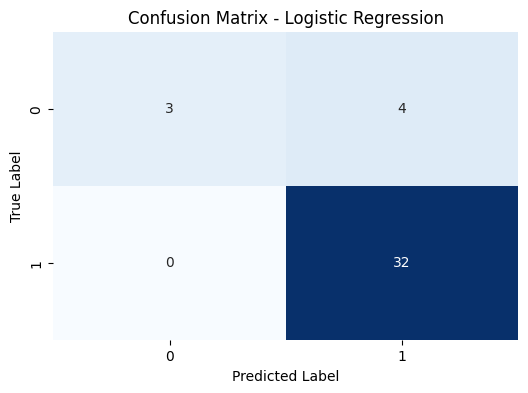

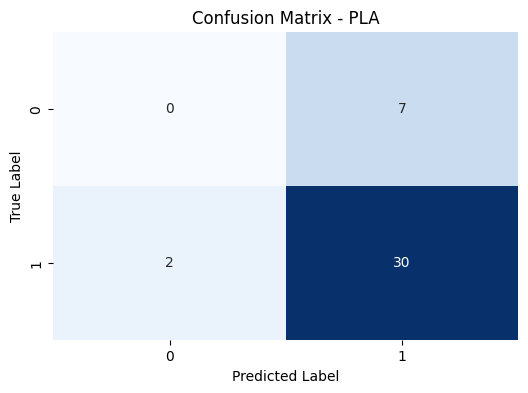

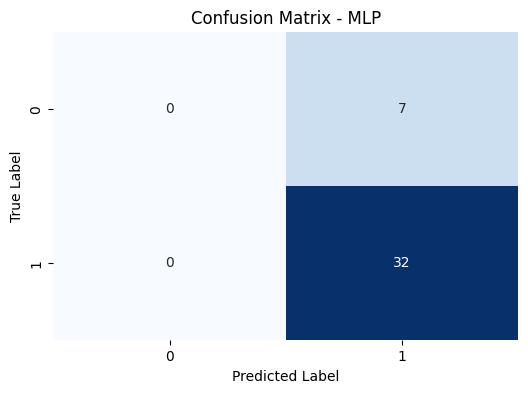

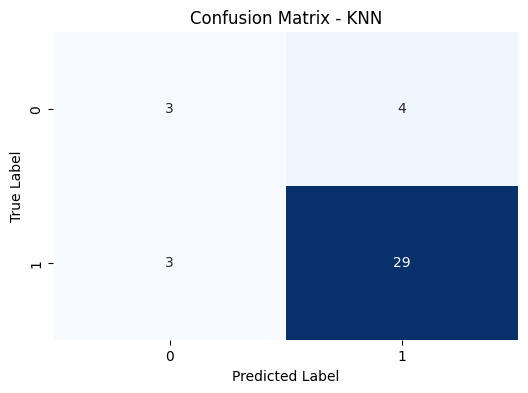

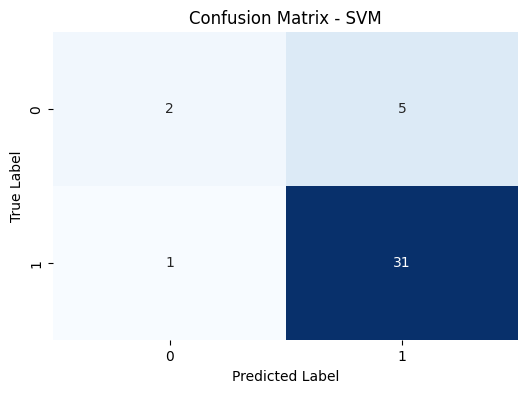

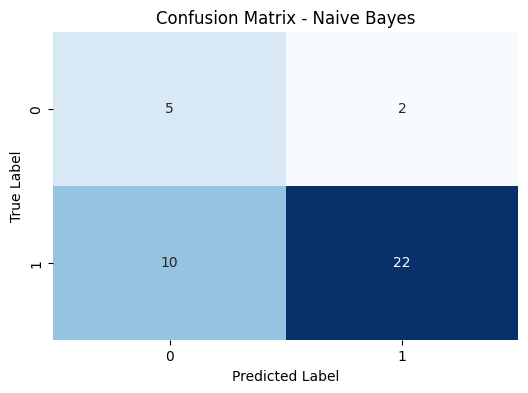

In [103]:


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test_binary, y_pred, name)


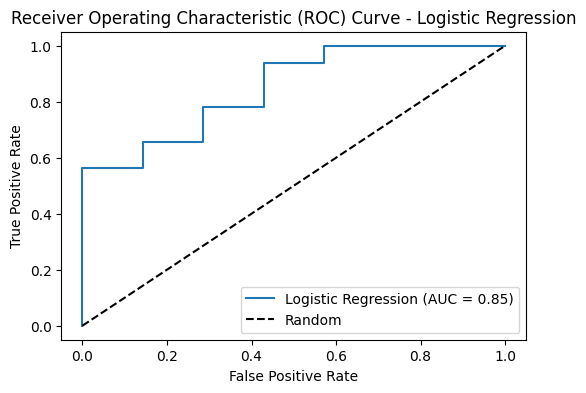

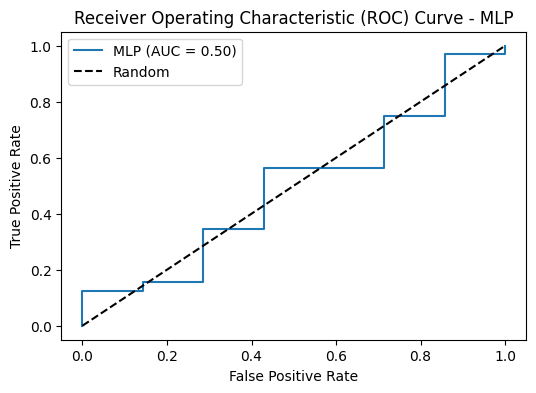

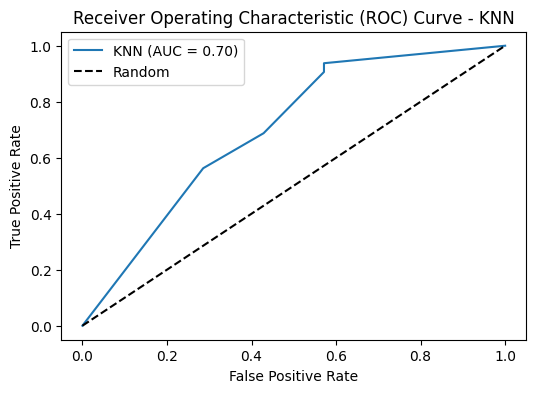

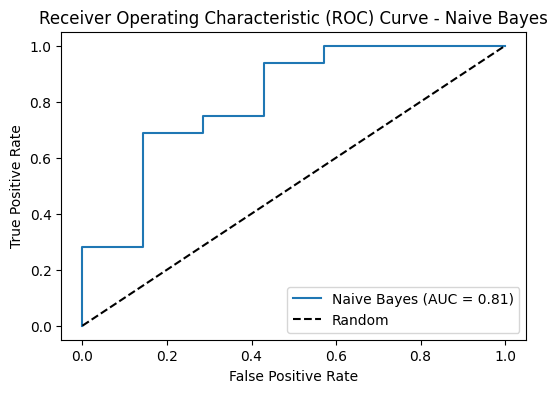

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score

# Iterate over models and plot ROC curve for each model
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        plt.figure(figsize=(6, 4))
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
        auc_score = roc_auc_score(y_test_binary, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend()
        plt.show()


In [105]:
#clustering performance using the silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X contains only the feature columns

# Initialize K-means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit K-means model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7039673707442137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
